<a href="https://colab.research.google.com/github/yashraz08/Delhi-AQI-Analysis-and-Machine-Learning-Project/blob/main/awp%2Bml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Necessary Libraries and Datasets**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = '/content/drive/MyDrive/project data/delhi_aqi.csv'
delhi_aqi_data = pd.read_csv(dataset)

**Display basic information about the dataset**

In [ ]:
delhi_aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


** Display few rows**

In [ ]:
 delhi_aqi_data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,25-11-2020 01:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,25-11-2020 02:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,25-11-2020 03:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,25-11-2020 04:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,25-11-2020 05:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


**Convert 'date' column to datetime format**

In [ ]:
delhi_aqi_data['date'] = pd.to_datetime(delhi_aqi_data['date'], format='%d-%m-%Y %H:%M', errors='coerce')

**Checking for missing or inconsistent values after conversion**

In [ ]:
missing_values = delhi_aqi_data.isnull().sum()

In [ ]:
missing_values

,0
date,0
co,0
no,0
no2,0
o3,0
so2,0
pm2_5,0
pm10,0
nh3,0


Drop rows with invalid 'date' values


In [ ]:
delhi_aqi_data_cleaned = delhi_aqi_data.dropna(subset=['date'])

In [ ]:
delhi_aqi_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18776 non-null  datetime64[ns]
 1   co      18776 non-null  float64       
 2   no      18776 non-null  float64       
 3   no2     18776 non-null  float64       
 4   o3      18776 non-null  float64       
 5   so2     18776 non-null  float64       
 6   pm2_5   18776 non-null  float64       
 7   pm10    18776 non-null  float64       
 8   nh3     18776 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 1.3 MB


In [ ]:
delhi_aqi_data_cleaned.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


**Descriptive statistics of pollutant levels**

In [ ]:
descriptive_stats = delhi_aqi_data_cleaned.describe()
descriptive_stats

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2021-12-23 14:35:34.384320256,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
min,2020-11-25 01:00:00,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,2021-06-09 14:45:00,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,2021-12-22 04:30:00,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,2022-07-07 18:15:00,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,2023-01-24 08:00:00,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000
std,NaN,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108


**Aggregate data to daily averages**

In [ ]:
delhi_aqi_daily = delhi_aqi_data_cleaned.resample('D', on='date').mean()

**Plot time-series trends for major pollutants**

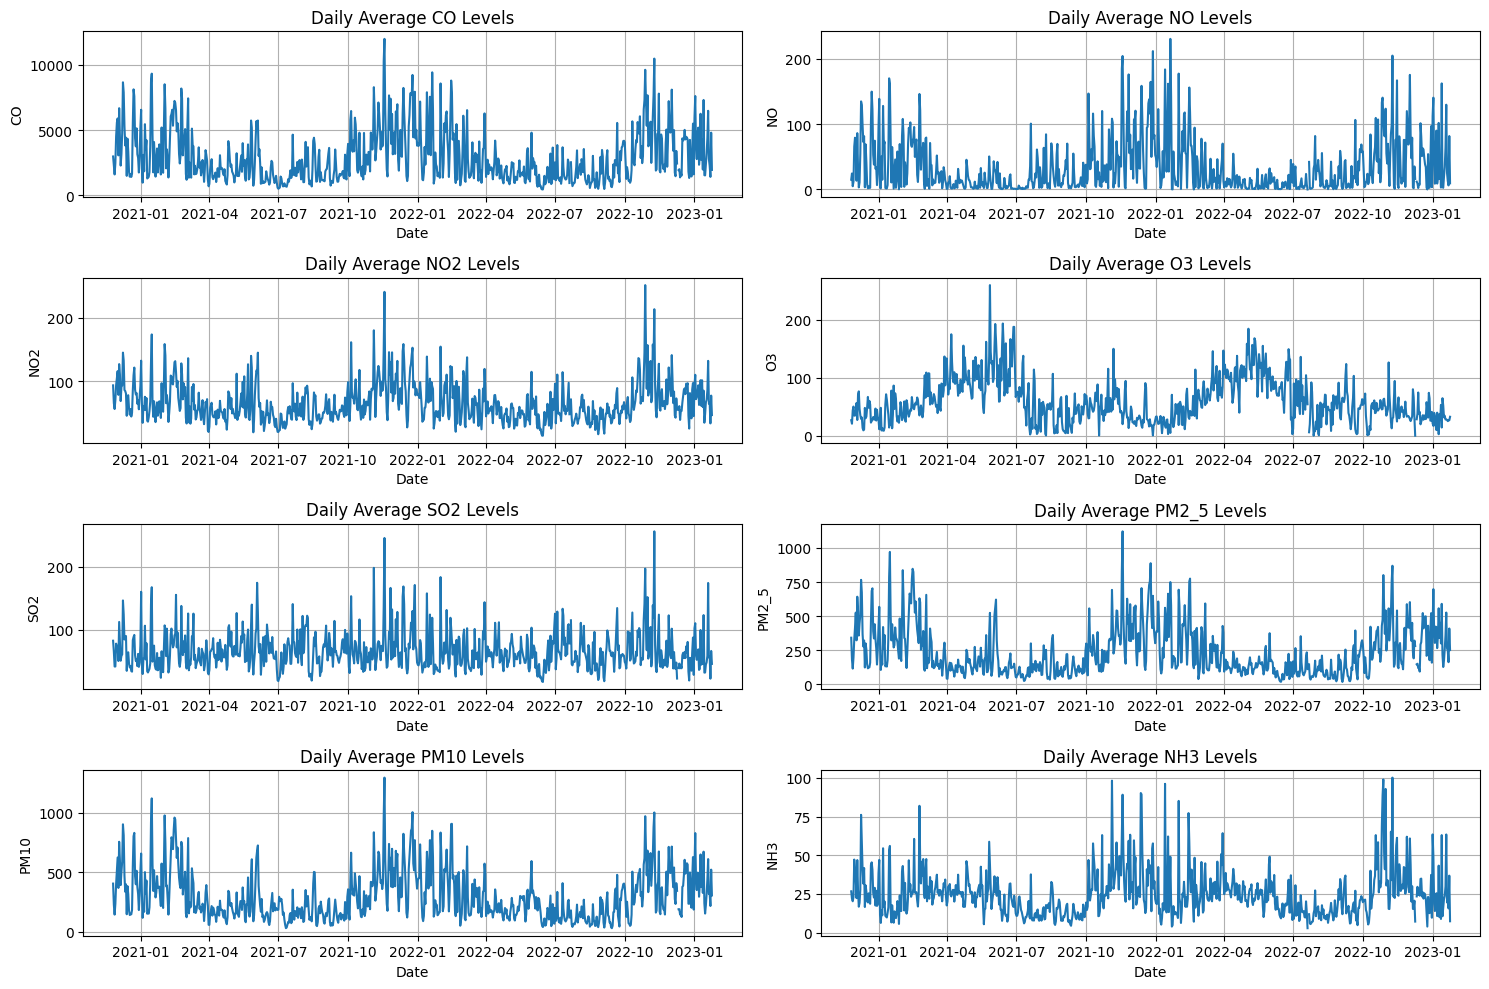

In [ ]:
plt.figure(figsize=(15, 10))
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(4, 2, i)
    plt.plot(delhi_aqi_daily.index, delhi_aqi_daily[pollutant], label=pollutant, color='tab:blue')
    plt.title(f'Daily Average {pollutant.upper()} Levels')
    plt.xlabel('Date')
    plt.ylabel(pollutant.upper())
    plt.grid(True)
    plt.tight_layout()
plt.show()

**Correlation analysis**

In [ ]:
correlation_matrix = delhi_aqi_data_cleaned[pollutants].corr()

**Visualize correlation matrix using a heatmap**

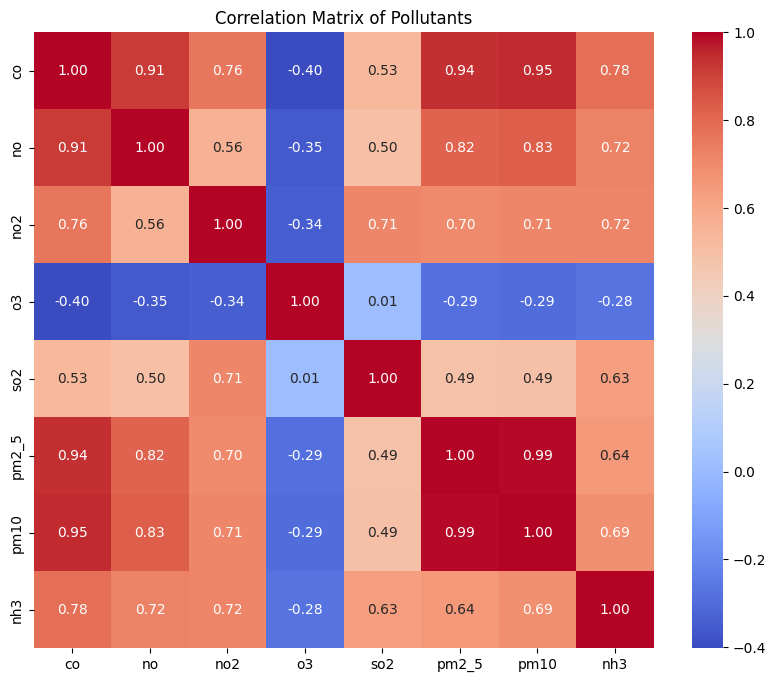

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix of Pollutants')
plt.show()

**Extract month and year for seasonal analysis**

In [ ]:
delhi_aqi_data_cleaned['month'] = delhi_aqi_data_cleaned['date'].dt.month
delhi_aqi_data_cleaned['year'] = delhi_aqi_data_cleaned['date'].dt.year

**Distribution analysis: KDE plots**

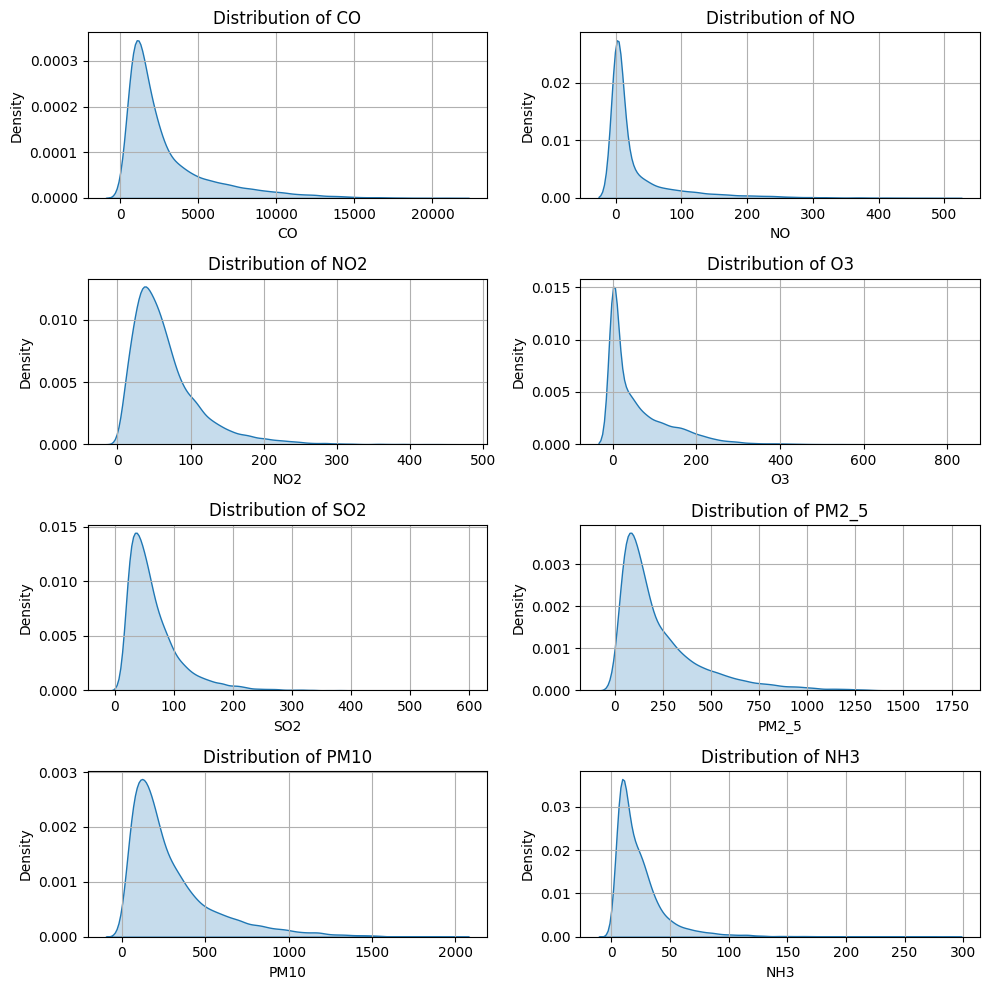

In [ ]:
plt.figure(figsize=(10, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(4, 2, i)
    sns.kdeplot(delhi_aqi_data_cleaned[pollutant], fill=True, color="tab:blue")
    plt.title(f'Distribution of {pollutant.upper()}')
    plt.xlabel(pollutant.upper())
    plt.grid(True)
plt.tight_layout()
plt.show()

**Making pair for pollutants to compare in scatter plots**

In [ ]:
scatter_pairs = [
    ('pm2_5', 'pm10'),
    ('no2', 'o3'),
    ('co', 'so2')
]

**Plotting Scatter Plots**

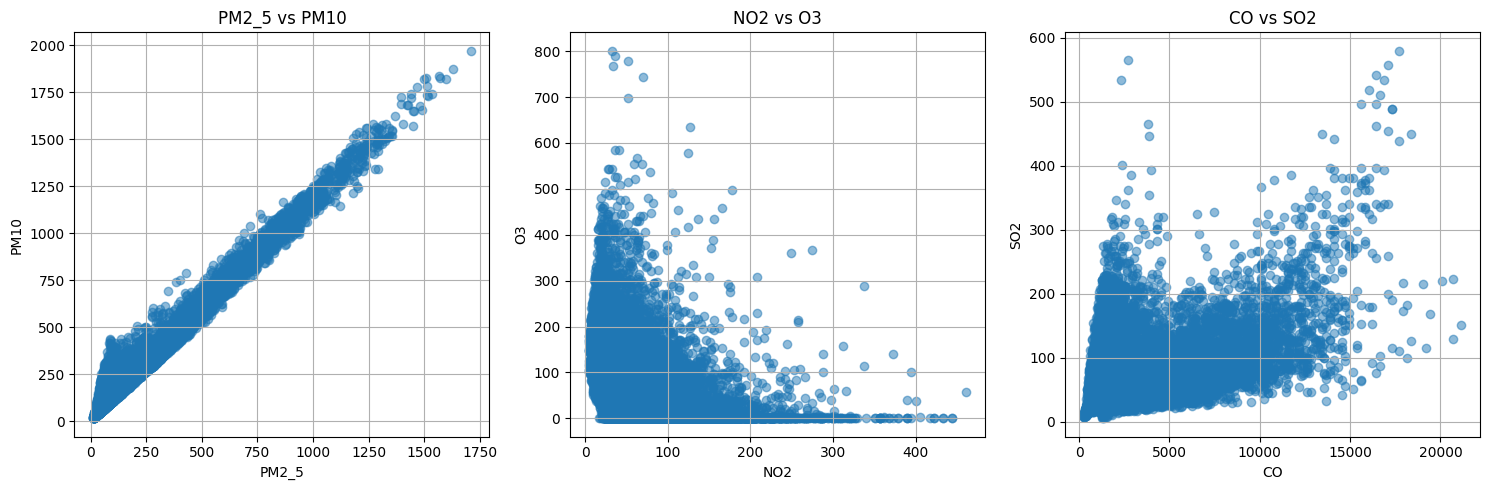

In [ ]:
plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(scatter_pairs, 1):
    plt.subplot(1, 3, i)
    plt.scatter(delhi_aqi_data_cleaned[x], delhi_aqi_data_cleaned[y], alpha=0.5, color='tab:blue')
    plt.title(f'{x.upper()} vs {y.upper()}')
    plt.xlabel(x.upper())
    plt.ylabel(y.upper())
    plt.grid(True)

plt.tight_layout()
plt.show()

**Extracting hour from the date column**

In [ ]:
delhi_aqi_data['hour'] = delhi_aqi_data['date'].dt.hour

**Calculating average pollutant level for each hour **

In [ ]:
hourly_avg = delhi_aqi_data.groupby('hour').mean()

**Ploting hourly trends**

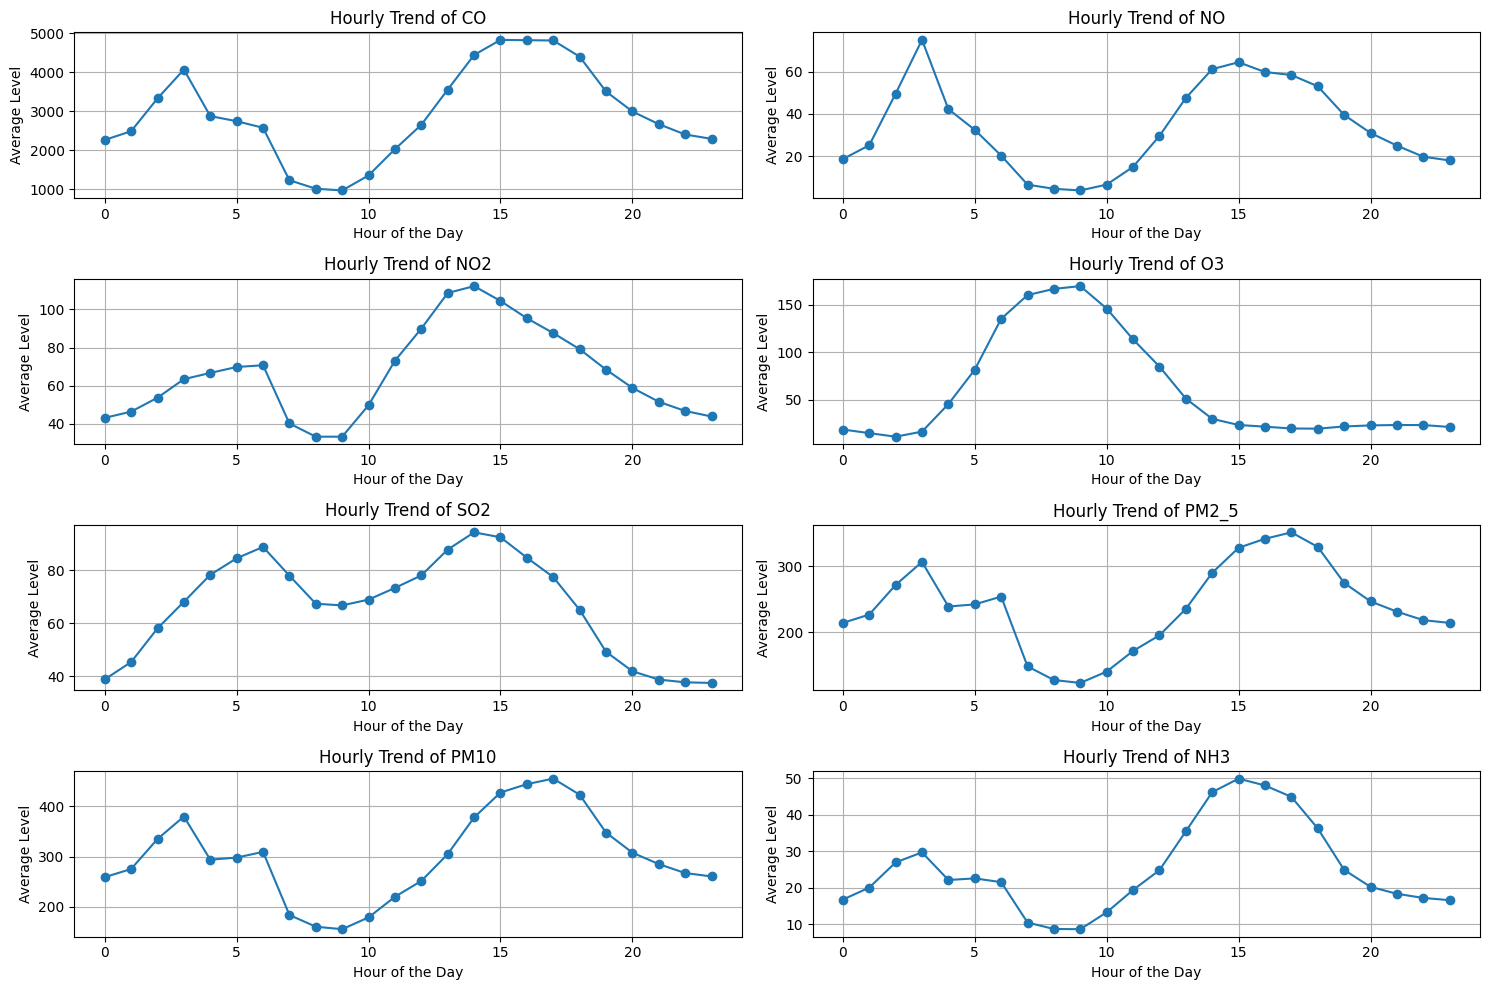

In [ ]:

plt.figure(figsize=(15, 10))
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(4, 2, i)
    plt.plot(hourly_avg.index, hourly_avg[pollutant], marker='o', color='tab:blue')
    plt.title(f'Hourly Trend of {pollutant.upper()}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Level')
    plt.grid(True)

plt.tight_layout()
plt.show()

**Machine Learning**

Importing neccesary libraries and dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

dataset = '/content/drive/MyDrive/project data/delhi_aqi.csv'
data = pd.read_csv(dataset)

converting date column to datetime


In [ ]:

data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna(subset=['date'])

# extract time-based features
data['hour'] = data['date'].dt.hour
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['weekday'] = data['date'].dt.weekday

<ipython-input-26-37d3c05967da>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'], errors='coerce')


dropping original date column


In [ ]:
data = data.drop(['date'], axis=1)

defining variables

In [ ]:
# X and  y
X = data.drop('pm2_5', axis=1)
y = data['pm2_5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)

# model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 232.79
Mean Absolute Error: 9.38
R^2 Score: 1.00


**Visualize actual vs predicted values**

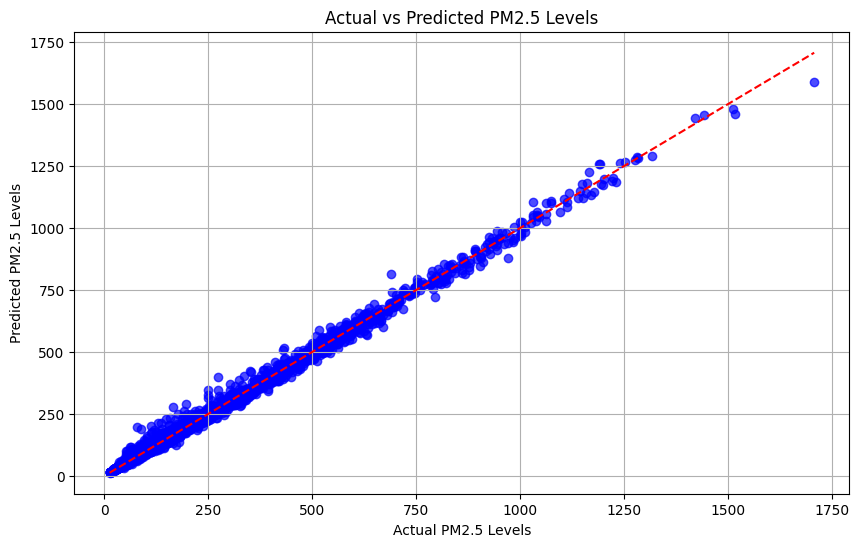

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual PM2.5 Levels')
plt.ylabel('Predicted PM2.5 Levels')
plt.title('Actual vs Predicted PM2.5 Levels')
plt.grid(True)
plt.show()